In [1]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import  ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score, roc_curve, precision_recall_curve
from sklearn.metrics import confusion_matrix
from tabulate import tabulate
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import label_binarize
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.metrics import roc_curve, auc
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler, ClusterCentroids
from imblearn.combine import SMOTEENN, SMOTETomek
import numpy as np

In [2]:
# Load the data and convert 'diabetes' column to binary
dat = pd.read_csv("clean.csv")
print("There are " + str(len(dat)) + " rows in the data")
print("There are " + str(len(dat. columns)) + " columns in the data")
dat.head()

There are 1009 rows in the data
There are 33 columns in the data


,Adm_Year,Gender,Age,HSC_Pass_Year,Program,Merit_Scholarship,Uni_Transport,Learn_Mode,Smartphone,PC,...,SM_Hours1,Avg_Attendance1,Skills1,Skill_Dev_Hours1,Interest_Area1,Prev_SGPA1,Curr_CGPA1,Completed_Credits1,Diploma,Family_Income1
0,2021,Female,22.0,2019,BCSE,Yes,No,Offline,Yes,Yes,...,2.0,100,Web development skill(Frontend),1,Networking,3.80,3.64,35,False,32500
1,2021,Male,22.0,2019,BCSE,No,No,Offline,Yes,Yes,...,2.0,90,Programming,1,Data Science,3.40,3.53,35,False,20000
2,2021,Male,20.0,2020,BCSE,Yes,Yes,Offline,Yes,Yes,...,1.0,95,Programming,3,Machine Learning / Deep Learning,3.93,3.89,35,False,30000
3,2021,Male,21.0,2020,BCSE,Yes,No,Online,Yes,Yes,...,3.0,95,Programming,1,Artificial Intelligence,3.10,3.50,35,False,25000
4,2021,Female,21.0,2019,BCSE,Yes,No,Offline,Yes,Yes,...,2.0,96,Web development skill(Frontend),1,Web Development,3.81,3.65,34,False,30000


In [3]:
print("Data types of columns:\n", dat.dtypes)


Data types of columns:
 Adm_Year                                                                        int64
Gender                                                                         object
Age                                                                           float64
HSC_Pass_Year                                                                   int64
Program                                                                        object
Merit_Scholarship                                                              object
Uni_Transport                                                                  object
Learn_Mode                                                                     object
Smartphone                                                                     object
PC                                                                             object
Eng_Proficiency                                                                object
Probation                     

## Finding the Missing Values

In [4]:
missing_values = dat.isnull().sum()

# Print the number of missing values for each column
print("Missing values per column:\n", missing_values)
rows_with_missing = dat.isnull().any(axis=1)

# Count the number of rows with at least one missing value
num_rows_with_missing = rows_with_missing.sum()

# Calculate the total number of rows
total_rows = len(dat)

# Calculate the percentage of rows with missing values
percentage_rows_with_missing = (num_rows_with_missing / total_rows) * 100

# Print the results
print(f"Number of rows with missing values: {num_rows_with_missing}")
print(f"Percentage of rows with missing values: {percentage_rows_with_missing:.2f}%")



Missing values per column:
 Adm_Year                                                                      0
Gender                                                                        0
Age                                                                           0
HSC_Pass_Year                                                                 0
Program                                                                       0
Merit_Scholarship                                                             0
Uni_Transport                                                                 0
Learn_Mode                                                                    0
Smartphone                                                                    0
PC                                                                            0
Eng_Proficiency                                                               0
Probation                                                                     0
Suspension  

In [5]:
# Drop rows with any missing values
df_cleaned = dat.dropna()

print(df_cleaned)

      Adm_Year  Gender   Age  HSC_Pass_Year Program Merit_Scholarship  \
0         2021  Female  22.0           2019    BCSE               Yes   
1         2021    Male  22.0           2019    BCSE                No   
2         2021    Male  20.0           2020    BCSE               Yes   
3         2021    Male  21.0           2020    BCSE               Yes   
4         2021  Female  21.0           2019    BCSE               Yes   
...        ...     ...   ...            ...     ...               ...   
1004      2021  Female  20.0           2020    BCSE                No   
1005      2022    Male  23.0           2020    BCSE               Yes   
1006      2021    Male  22.0           2020    BCSE                No   
1007      2019  Female  25.0           2018    BCSE                No   
1008      2018  Female  23.0           2017    BCSE                No   

     Uni_Transport Learn_Mode Smartphone   PC  ... SM_Hours1 Avg_Attendance1  \
0               No    Offline        Yes  Y

## Descriptive Stats

In [6]:
unique_counts = df_cleaned.nunique()

print(unique_counts)

Adm_Year                                                                       12
Gender                                                                          2
Age                                                                            10
HSC_Pass_Year                                                                  12
Program                                                                         1
Merit_Scholarship                                                               2
Uni_Transport                                                                   2
Learn_Mode                                                                      2
Smartphone                                                                      2
PC                                                                              2
Eng_Proficiency                                                                 3
Probation                                                                       2
Suspension      

In [7]:
# Calculate count and percentage of each class for categorical columns
categorical_columns = df_cleaned.select_dtypes(include=['object']).columns

for col in categorical_columns:
    # Count occurrences of each value
    counts = df_cleaned[col].value_counts()
    
    # Calculate percentages
    percentages =( df_cleaned[col].value_counts(normalize=True) * 100).round(2)
    
    # Create a DataFrame with the results
    distribution = pd.DataFrame({
        'Count': counts,
        'Percentage': percentages
    }).reset_index().rename(columns={'index': 'Class'})
    
    # Print the DataFrame in a tabular format using tabulate
    print(f"Class distribution for column '{col}':")
    print(tabulate(distribution, headers='keys', tablefmt='pretty', showindex=False))
    print()
   

Class distribution for column 'Gender':
+--------+-------+------------+
| Gender | Count | Percentage |
+--------+-------+------------+
|  Male  |  555  |   55.44    |
| Female |  446  |   44.56    |
+--------+-------+------------+

Class distribution for column 'Program':
+---------+-------+------------+
| Program | Count | Percentage |
+---------+-------+------------+
|  BCSE   | 1001  |   100.0    |
+---------+-------+------------+

Class distribution for column 'Merit_Scholarship':
+-------------------+-------+------------+
| Merit_Scholarship | Count | Percentage |
+-------------------+-------+------------+
|        No         |  584  |   58.34    |
|        Yes        |  417  |   41.66    |
+-------------------+-------+------------+

Class distribution for column 'Uni_Transport':
+---------------+-------+------------+
| Uni_Transport | Count | Percentage |
+---------------+-------+------------+
|      No       |  603  |   60.24    |
|      Yes      |  398  |   39.76    |
+-------

In [8]:
# Descriptive statistics for numerical columns
numerical_desc = df_cleaned.describe()

# Descriptive statistics for categorical columns


# Print the results
print("Descriptive statistics for numerical columns:")
numerical_desc

Descriptive statistics for numerical columns:


,Adm_Year,Age,HSC_Pass_Year,Curr_Sem1,Study_Hours1,Study_Sessions1,SM_Hours1,Avg_Attendance1,Skill_Dev_Hours1,Prev_SGPA1,Curr_CGPA1,Completed_Credits1,Family_Income1
count,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1.001000e+03
mean,2040.478521,21.369231,2019.245754,43.280719,3.339288,2.067433,3.446803,88.092907,2.225774,2.759011,3.210235,76.719281,6.332989e+04
std,632.188385,1.614092,1.347421,267.920970,2.101268,1.035711,2.444786,16.099576,1.473423,0.859560,0.732910,47.714297,7.953455e+04
min,2013.000000,18.000000,2012.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.530000e+03
25%,2020.000000,20.000000,2019.000000,3.000000,2.000000,1.000000,2.000000,80.000000,1.000000,2.110000,2.880000,24.000000,3.000000e+04
50%,2021.000000,21.000000,2020.000000,8.000000,3.000000,2.000000,3.000000,95.000000,2.000000,2.770000,3.390000,85.000000,5.000000e+04
75%,2022.000000,22.000000,2020.000000,10.000000,4.000000,2.000000,4.000000,100.000000,3.000000,3.480000,3.700000,121.000000,7.700000e+04
max,22022.000000,26.000000,2028.000000,2022.000000,30.000000,10.000000,20.000000,100.000000,20.000000,5.000000,4.670000,147.000000,2.000000e+06


In [9]:
y = df_cleaned.Target

# Drop the column with the target variable (Systolic)
X = df_cleaned.drop(['Target'], axis=1)

# If there are categorical variables, create dummy variables
X = pd.get_dummies(X, drop_first=True)

# Convert all features to float64 (if necessary)
X = X.astype('float64')

X.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1001 entries, 0 to 1008
Columns: 118 entries, Adm_Year to Interest_Area1_confuse
dtypes: float64(118)
memory usage: 930.6 KB


In [10]:
X

,Adm_Year,Age,HSC_Pass_Year,Curr_Sem1,Study_Hours1,Study_Sessions1,SM_Hours1,Avg_Attendance1,Skill_Dev_Hours1,Prev_SGPA1,...,Interest_Area1_Software,"Interest_Area1_Software, App","Interest_Area1_Software, BCS","Interest_Area1_Software, Blockchain Engineering","Interest_Area1_Software, Hardware",Interest_Area1_Teaching,Interest_Area1_UI/UX,Interest_Area1_Web Development,Interest_Area1_Web developing,Interest_Area1_confuse
0,2021.0,22.0,2019.0,4.0,2.0,2.0,2.0,100.0,1.0,3.80,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2021.0,22.0,2019.0,4.0,3.5,2.0,2.0,90.0,1.0,3.40,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2021.0,20.0,2020.0,4.0,2.0,1.0,1.0,95.0,3.0,3.93,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2021.0,21.0,2020.0,4.0,1.0,2.0,3.0,95.0,1.0,3.10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2021.0,21.0,2019.0,4.0,3.0,2.0,2.0,96.0,1.0,3.81,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004,2021.0,20.0,2020.0,8.0,1.0,2.0,2.0,46.0,2.0,2.65,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1005,2022.0,23.0,2020.0,8.0,4.0,4.0,4.0,100.0,2.0,2.50,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1006,2021.0,22.0,2020.0,9.0,3.0,3.0,2.0,100.0,2.0,1.56,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1007,2019.0,25.0,2018.0,11.0,5.0,3.0,3.0,100.0,4.0,1.40,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
y.value_counts()


Target
Poor         500
Average      267
Good         178
Excellent     56
Name: count, dtype: int64

In [12]:
#X_train1, X_test, y_train1, y_test = train_test_split(X, y, test_size=0.3, random_state=21, stratify =  y)

In [13]:

#SMOTE
smote = SMOTE(sampling_strategy = 'auto')
X_resampled, y_resampled = smote.fit_resample(X, y)
#y_train.value_counts() 


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=17, stratify = y_resampled)

In [15]:
y_train.value_counts()
y_test.value_counts()

Target
Excellent    150
Average      150
Poor         150
Good         150
Name: count, dtype: int64

### Multi-Class Classification Strategies

#### One-vs-Rest (OvR)

- **Definition**: In the OvR strategy, a separate binary classifier is trained for each class. Each classifier distinguishes one class from the rest of the classes.
- **Process**:
  - For a classification problem with \( N \) classes, \( N \) binary classifiers are trained.
  - Each classifier predicts whether a sample belongs to its respective class os dominates.

#### One-vs-One (OvO)

- **Definition**: In the OvO strategy, a separate binary classifier is trained for every pair of classes. Each classifier distinguishes between two classes.
 - For a classification problem with \( N \) classes,( N*(N-1)/2 binary classifiers are trained.fiers are trained.
  - Each classifier is trained on samples from implement and interpret.

### Classification Decision Methods

#### Majority Voting

- **Definition**: In this method, each classifier votes for a class. The class with the majority of votes is selected as the final classification.
- **Application**:
  - Commonly used in OvO strategies where each pairwise classifier provides a vote.
  - Suitable for scenarios where the decision is based on a simple majority rule.

#### Probability-Based Decision

- **Definition**: In this method, the classifier predicts the class based on the highest probability score.
- **Application**:
  - Used in OvR strategies and some classifiers like `LogisticRegression` and `SVC` with `probability=True`.
  - Provides a probabilistic estimate of each class, and the class with the highest probability is chosen.
  - Useful when you need to understand the confidence of the prediction.

### Summary

- **OvR**: Simpler, fewer classifiers, good for imbalanced data.
- **OvO**: More classifiers, potentially higher accuracy, better for overlapping classes.
- **Majority Voting**: Decision based on the most votes from classifiers.
- **Probability-Based Decision**: Classification based on the highest probability score, providing insight into prediction confidence.


## Logistic Regression

In [16]:
# Initialize Logistic Regression with multiclass setting
model = LogisticRegression( multi_class='ovr',C=0.01, solver='liblinear',random_state=0)

# Fit the model
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.5483333333333333


In [17]:
# Predict on training and test data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.fit_transform(y_test)
print("Class labels in the order used by the model:", model.classes_)


Class labels in the order used by the model: ['Average' 'Excellent' 'Good' 'Poor']


In [18]:
# Extract feature names and coefficients
feature_names = X_train.columns
coefficients = model.coef_  # For multi-class, this returns an array of shape (n_classes, n_features)
odds_ratios = np.exp(coefficients)

# Create a DataFrame for each class
dfs = []
for i, class_name in enumerate(model.classes_):
    class_coefficients = coefficients[i]
    class_odds_ratios = odds_ratios[i]
    
    df_class = pd.DataFrame({
        'Feature': feature_names,
        'Coefficient': class_coefficients,
        'Odds Ratio': class_odds_ratios
    })
    df_class['Class'] = class_name
    dfs.append(df_class)

# Concatenate all DataFrames into a single DataFrame
df_all_classes = pd.concat(dfs, ignore_index=True)
# Adjust display settings
pd.set_option('display.max_rows', None)  # Set to None to display all rows
pd.set_option('display.max_columns', None)  # Set to None to display all columns if needed
# Print the DataFrame
df_all_classes

,Feature,Coefficient,Odds Ratio,Class
0,Adm_Year,2.309329e-03,1.002312,Average
1,Age,-5.005839e-02,0.951174,Average
2,HSC_Pass_Year,-3.088192e-03,0.996917,Average
3,Curr_Sem1,-1.828307e-04,0.999817,Average
4,Study_Hours1,-1.918937e-01,0.825395,Average
5,Study_Sessions1,-1.575445e-02,0.984369,Average
6,SM_Hours1,-8.747226e-02,0.916244,Average
7,Avg_Attendance1,2.121391e-02,1.021441,Average
8,Skill_Dev_Hours1,-6.555817e-02,0.936545,Average
9,Prev_SGPA1,-2.534222e-02,0.974976,Average


### Coefficient Interpretation in Logistic Regression

- **Coefficient = 0**:
  - **Implication**: A coefficient of 0 means that the feature has no effect on the log odds of the outcome. 
  - **Likelihood**: The feature does not influence the likelihood of being in the target class. 

- **Coefficient > 0**:
  - **Positive Coefficient**: Indicates that as the feature value increases, the log odds of the outcome (e.g., being classified as the target class) increase.
  - **Implication**: Higher values of the feature are associated with a higher likelihood of being in the target class.
  - **Odds Ratio**: An odds ratio greater than 1 corresponds to this positive coefficient, meaning the odds of the outcome increase with each additional unit of the feature.

- **Coefficient < 0**:
  - **Negative Coefficient**: Indicates that as the feature value increases, the log odds of the outcome decrease.
  - **Implication**: Higher values of the feature are associated with a lower likelihood of being in the target class.
  - **Odds Ratio**: An odds ratio less than 1 corresponds to this negative coefficient, meaning the odds of the outcome decrease with each additional unit of the feature.


<Figure size 800x600 with 0 Axes>

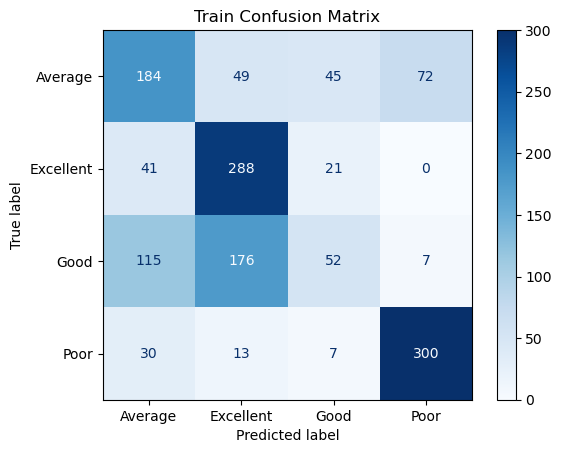

<Figure size 800x600 with 0 Axes>

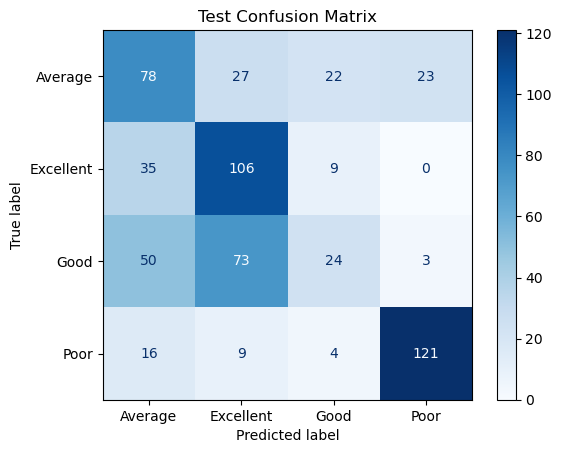

In [19]:
def cm_plot_display(y_train,y_pred_tr, y_test, y_pred):

    cm = confusion_matrix(y_train, y_pred_tr)
    
    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_).plot(cmap=plt.cm.Blues, values_format='d')
    plt.title('Train Confusion Matrix')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()

    cm_ts = confusion_matrix(y_test, y_pred)
    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    ConfusionMatrixDisplay(confusion_matrix=cm_ts, display_labels=label_encoder.classes_).plot(cmap=plt.cm.Blues, values_format='d')
    plt.title('Test Confusion Matrix')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()
    
cm_plot_display(y_train, y_train_pred, y_test, y_test_pred)

In [20]:
def calculate_performance_metrics(y_train_true, y_train_pred, y_test_true, y_test_pred, average='weighted'):
    """
    Calculate performance metrics for classification for both training and test sets.
    
    Parameters:
    y_train_true (array-like): True labels for the training set.
    y_train_pred (array-like): Predicted labels for the training set.
    y_test_true (array-like): True labels for the test set.
    y_test_pred (array-like): Predicted labels for the test set.
    average (str): Type of averaging performed on the data. Default is 'weighted'.
    
    Returns:
    pd.DataFrame: A DataFrame with metrics for training and test sets.
    """
    
    metrics = {
        'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
        'Train Set': [
            accuracy_score(y_train_true, y_train_pred),
            precision_score(y_train_true, y_train_pred, average=average),
            recall_score(y_train_true, y_train_pred, average=average),
            f1_score(y_train_true, y_train_pred, average=average)
        ],
        'Test Set': [
            accuracy_score(y_test_true, y_test_pred),
            precision_score(y_test_true, y_test_pred, average=average),
            recall_score(y_test_true, y_test_pred, average=average),
            f1_score(y_test_true, y_test_pred, average=average)
        ]
    }
    
    metrics_df = pd.DataFrame(metrics)
    return metrics_df

In [21]:
evaluation_metrics = calculate_performance_metrics(y_train, y_train_pred, y_test, y_test_pred, average='weighted')
evaluation_metrics

,Metric,Train Set,Test Set
0,Accuracy,0.588571,0.548333
1,Precision,0.563096,0.539672
2,Recall,0.588571,0.548333
3,F1 Score,0.552659,0.524866


### Evaluation Metrics

- **Accuracy**: The proportion of correctly predicted samples out of all samples. A higher accuracy means the model is generally making correct predictions.

- **Precision**: The proportion of true positive predictions out of all positive predictions made by the model. It shows how often the model’s positive predictions are correct.

- **Recall**: The proportion of true positive predictions out of all actual positive samples. It indicates how well the model identifies all relevant samples for a class.

- **F1 Score**: The harmonic mean of precision and recall. It balances the two metrics and provides a single score for overall performance.



In [22]:
def plot_roc_curve(model, X_test, y_test, classes):
    """
    Plot ROC curves for each class for the given model.
    
    Parameters:
    model (object): The trained model with a predict_proba method.
    X_test (array-like): Test feature set.
    y_test (array-like): True labels for the test set.
    classes (list): List of class names used for binarization.
    
    Returns:
    None
    """
    # Get predicted probabilities
    y_score = model.predict_proba(X_test)

    # Binarize the output
    y_test_bin = label_binarize(y_test, classes=classes)
    n_classes = y_test_bin.shape[1]

    # Plot ROC curves for each class
    plt.figure()
    for class_index in range(n_classes):
        fpr, tpr, _ = roc_curve(y_test_bin[:, class_index], y_score[:, class_index])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Class {classes[class_index]} (AUC = {roc_auc:.2f})')

    # Plot the diagonal line
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    model_name_str = str(model)
    # Final plot adjustments
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve - ' + model_name_str)    
    plt.legend(loc="lower right")
    plt.show()

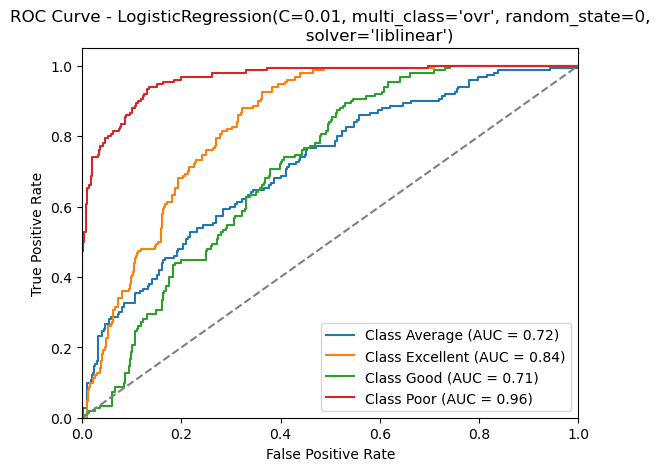

In [23]:
plot_roc_curve(model, X_test, y_test, classes=['Average' ,'Excellent' ,'Good' ,'Poor'])


## LDA - Linear Discriminant Analysis

In [24]:
# Encode target variable into numerical format
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.fit_transform(y_test)

# Perform Linear Discriminant Analysis (LDA) on the training set
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train_encoded)

# Predict the labels for the training and test sets
y_train_pred = lda.predict(X_train)
y_test_pred = lda.predict(X_test)



<Figure size 800x600 with 0 Axes>

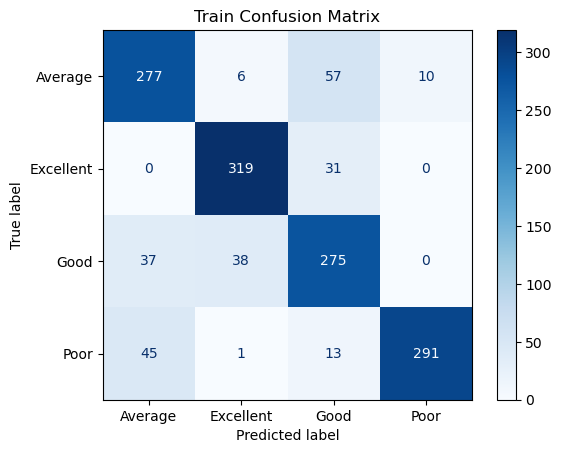

<Figure size 800x600 with 0 Axes>

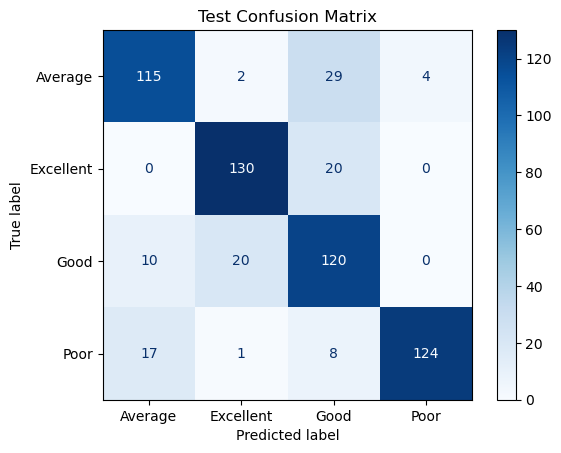

In [25]:

cm_plot_display(y_train_encoded, y_train_pred, y_test_encoded, y_test_pred)




In [26]:
evaluation_metrics = calculate_performance_metrics(y_train_encoded, y_train_pred, y_test_encoded, y_test_pred, average='weighted')
evaluation_metrics

,Metric,Train Set,Test Set
0,Accuracy,0.830000,0.815000
1,Precision,0.836530,0.826562
2,Recall,0.830000,0.815000
3,F1 Score,0.831631,0.817947


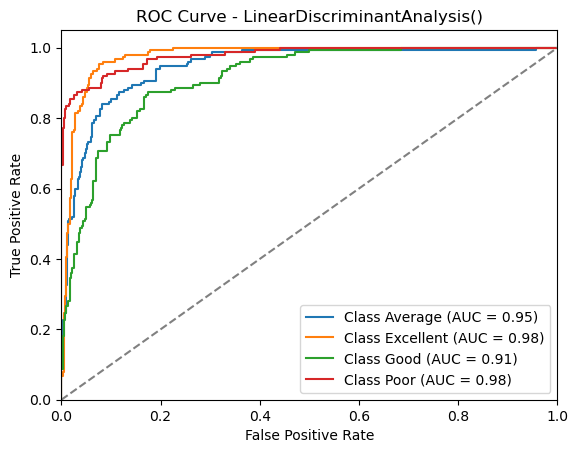

In [27]:
plot_roc_curve(lda, X_test, y_test, classes=['Average' ,'Excellent' ,'Good' ,'Poor'])


## QDA

In [28]:
# Encode target variable into numerical format
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.fit_transform(y_test)

# Perform QDA on the training set
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train_encoded)



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis()

<Figure size 800x600 with 0 Axes>

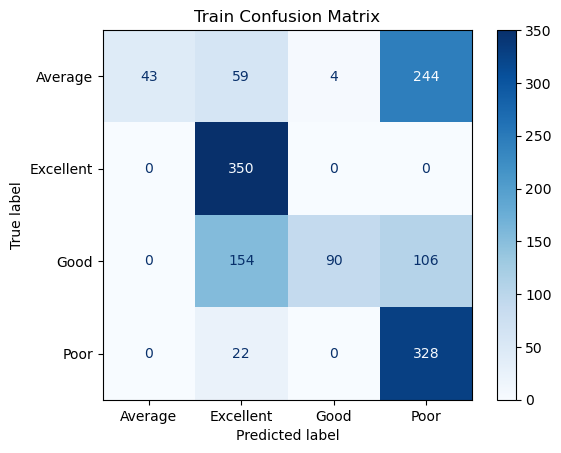

<Figure size 800x600 with 0 Axes>

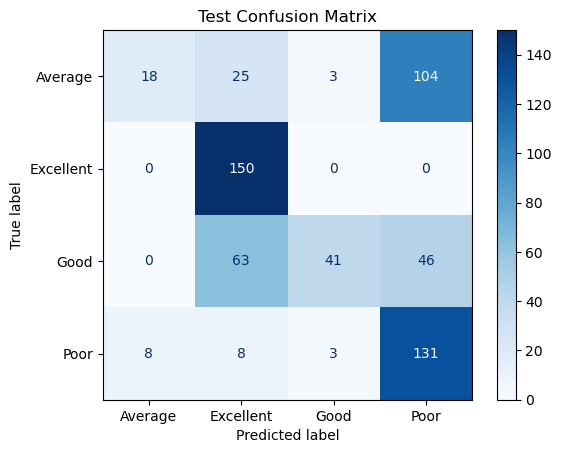

In [29]:
# Predict the labels for the training and test sets
y_train_pred = qda.predict(X_train)
y_test_pred = qda.predict(X_test)
cm_plot_display(y_train_encoded, y_train_pred, y_test_encoded, y_test_pred)

In [30]:
evaluation_metrics = calculate_performance_metrics(y_train_encoded, y_train_pred, y_test_encoded, y_test_pred, average='weighted')
evaluation_metrics

,Metric,Train Set,Test Set
0,Accuracy,0.579286,0.566667
1,Precision,0.759878,0.660149
2,Recall,0.579286,0.566667
3,F1 Score,0.502758,0.496563


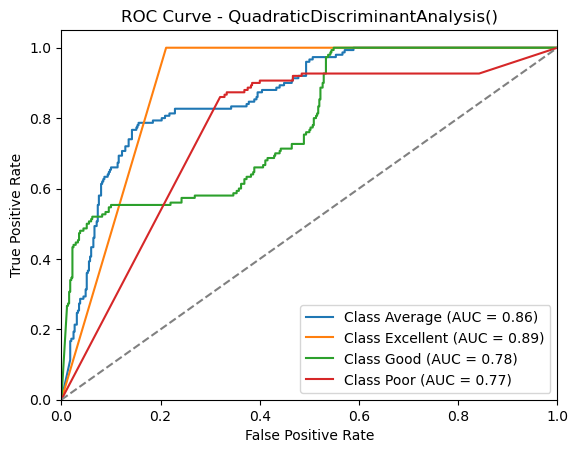

In [31]:
plot_roc_curve(qda, X_test, y_test, classes=['Average' ,'Excellent' ,'Good' ,'Poor'])


## KNN - K Nearest Neighbours

In [32]:
# Define a range of K values to search
param_grid =  {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}# Range of K values from 1 to 20

# Initialize KNN classifier
knn = KNeighborsClassifier()

# Perform grid search to find the best K
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train_encoded)

# Get the best K value
best_k = grid_search.best_params_['n_neighbors']
print("Best K:", best_k)

Best K: 1


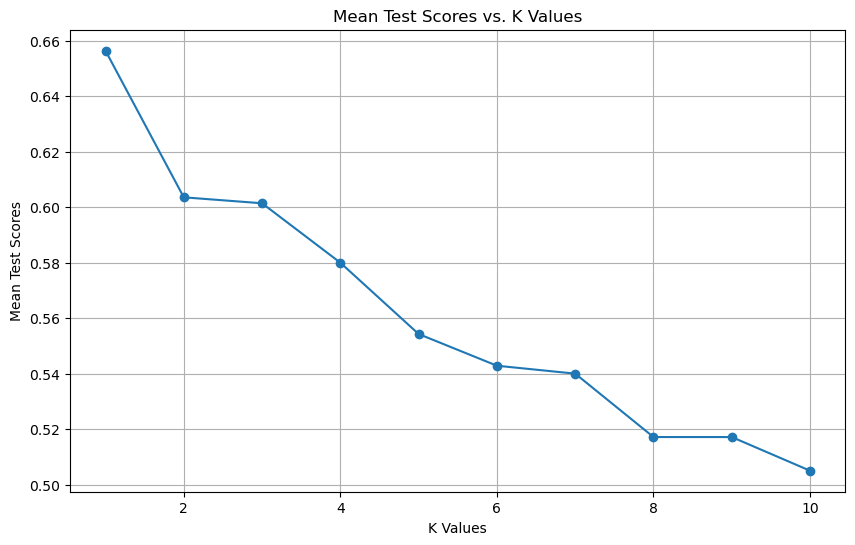

In [33]:
# Extract the mean test scores and K values from the grid search results
mean_test_scores = grid_search.cv_results_['mean_test_score']
k_values = grid_search.cv_results_['param_n_neighbors'] # Extract the K values used in the grid search

# Plot the mean test scores against K values
plt.figure(figsize=(10, 6))
plt.plot(k_values, mean_test_scores, marker='o', linestyle='-')
plt.title('Mean Test Scores vs. K Values')
plt.xlabel('K Values')
plt.ylabel('Mean Test Scores')
# plt.xticks(k_values) # No need for this line, as k_values are now directly from the grid search
plt.grid(True)
plt.show()

In [34]:
grid_search.fit(X_train, y_train_encoded)

# Train KNN with the best K value
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train_encoded)

# Predict the labels for the training and test sets
y_train_pred = knn_best.predict(X_train)
y_test_pred = knn_best.predict(X_test)



In [35]:
y_pred = grid_search.best_estimator_.predict(X_test)
y_train_pred = grid_search.best_estimator_.predict(X_train)

In [36]:
evaluation_metrics = calculate_performance_metrics(y_train_encoded, y_train_pred, y_test_encoded, y_test_pred, average='weighted')
evaluation_metrics

,Metric,Train Set,Test Set
0,Accuracy,1.0,0.631667
1,Precision,1.0,0.629719
2,Recall,1.0,0.631667
3,F1 Score,1.0,0.628549


<Figure size 800x600 with 0 Axes>

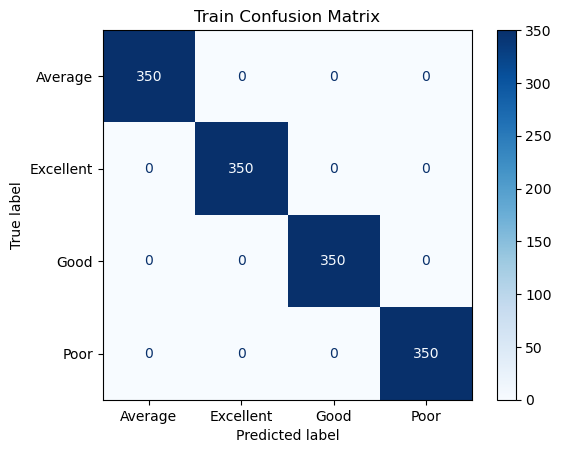

<Figure size 800x600 with 0 Axes>

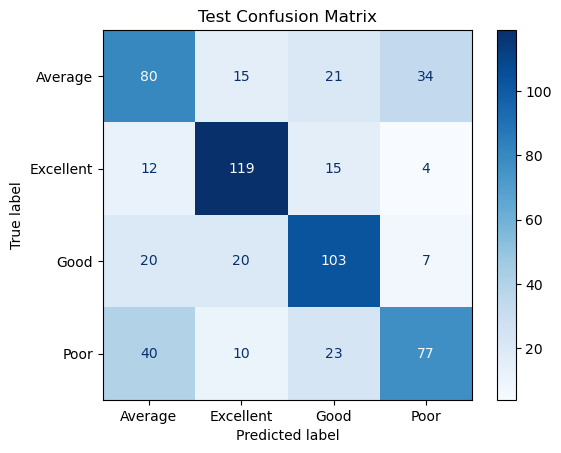

In [37]:
cm_plot_display(y_train_encoded, y_train_pred, y_test_encoded, y_test_pred)

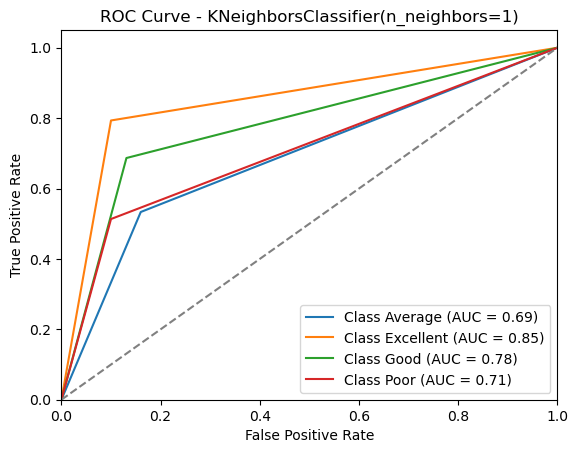

In [38]:
plot_roc_curve(knn_best, X_test, y_test, classes=['Average' ,'Excellent' ,'Good' ,'Poor'])


### SVM - Support Vector Machine

In [39]:
from sklearn import svm
svm_classifier = svm.SVC(kernel='rbf', probability = True)
svm_classifier.fit(X_train, y_train_encoded) 

 

SVC(probability=True)

In [40]:
# Predict the labels for the training and test sets
y_train_pred = svm_classifier.predict(X_train)
y_test_pred = svm_classifier.predict(X_test)
print(y_test_encoded)
print(y_test_pred)

[1 1 0 3 1 1 0 1 2 3 0 1 1 2 1 2 1 3 1 2 1 1 3 3 3 0 2 3 3 1 0 2 1 1 2 0 1
 2 2 2 3 1 1 3 0 0 2 2 0 0 3 1 1 1 3 0 2 1 0 2 2 3 3 3 0 1 1 1 1 2 0 1 0 0
 1 2 0 0 2 3 0 3 0 3 1 0 2 3 3 2 1 1 2 3 0 1 1 3 3 1 3 3 3 0 2 1 1 3 3 1 0
 1 3 3 2 0 0 3 3 1 3 2 2 0 0 1 3 1 1 2 1 3 1 1 2 1 0 3 1 0 0 1 3 0 0 2 3 2
 3 2 0 0 3 1 3 0 1 0 1 3 2 0 2 2 3 3 2 3 2 3 2 2 2 1 0 1 2 1 0 2 2 0 3 1 2
 1 1 1 3 1 3 0 2 3 0 1 0 3 2 1 3 3 0 3 2 1 1 1 1 1 2 2 1 0 2 3 1 1 1 0 1 2
 2 3 1 2 1 3 2 0 0 0 3 3 1 3 2 3 2 3 1 1 3 3 2 1 0 2 2 2 1 1 3 3 0 0 3 2 0
 2 2 2 2 1 1 0 1 1 0 0 3 3 1 1 3 1 1 3 0 1 1 1 0 1 3 3 3 0 3 1 0 3 2 2 2 0
 3 2 0 0 2 1 2 0 1 3 2 2 0 0 2 3 3 3 1 2 0 3 0 0 0 3 0 0 2 0 0 3 0 2 2 0 0
 3 0 0 0 1 0 1 3 0 2 0 0 3 3 2 3 2 0 1 1 2 1 2 1 1 2 0 2 2 3 3 3 0 1 3 3 2
 0 3 2 1 1 0 0 0 3 1 3 0 1 2 3 2 2 2 3 0 2 2 3 1 0 3 0 3 2 2 3 1 2 0 1 2 2
 2 0 2 3 2 2 2 1 3 1 0 3 0 2 0 3 0 1 3 1 1 3 2 2 3 2 0 2 0 0 3 3 1 3 2 3 1
 2 0 3 3 2 0 1 3 2 2 2 2 3 0 1 2 1 0 0 0 1 3 0 2 3 0 0 0 0 3 0 2 3 0 0 3 1
 0 2 2 1 2 2 2 1 2 2 1 0 

<Figure size 800x600 with 0 Axes>

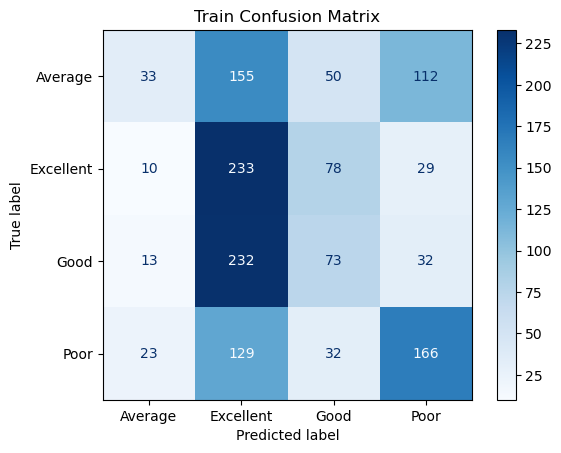

<Figure size 800x600 with 0 Axes>

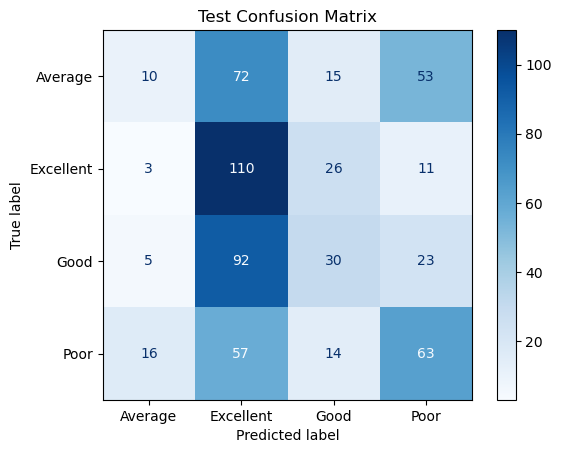

In [41]:
cm_plot_display(y_train_encoded, y_train_pred, y_test_encoded, y_test_pred)

In [42]:
evaluation_metrics = calculate_performance_metrics(y_train_encoded, y_train_pred, y_test_encoded, y_test_pred, average='weighted')
evaluation_metrics

,Metric,Train Set,Test Set
0,Accuracy,0.360714,0.355000
1,Precision,0.382946,0.349846
2,Recall,0.360714,0.355000
3,F1 Score,0.327539,0.310349


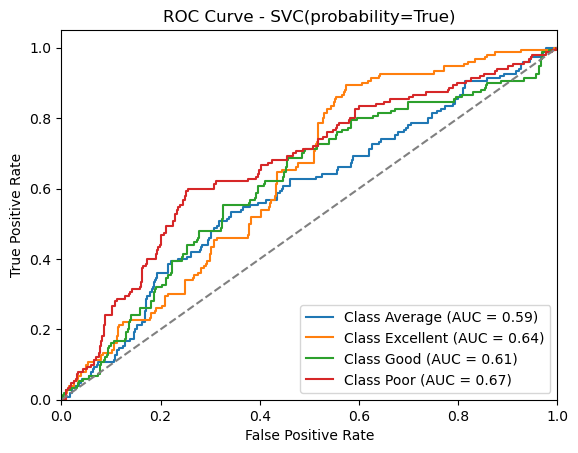

In [43]:
plot_roc_curve(svm_classifier, X_test, y_test, classes=['Average' ,'Excellent' ,'Good' ,'Poor'])


In [44]:
param_grid = {
    'kernel': ['poly', 'rbf'],
    'C': [0.01,0.1, 1],
    'probability': [True]  # Enable probability estimates
}

# Create the SVM classifier with probability=True
svm_classifier = svm.SVC(decision_function_shape='ovr', probability = True)

# Set up the GridSearchCV
grid_search = GridSearchCV(svm_classifier, param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the model with the grid search
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best parameters found:")
print(grid_search.best_params_)
print("Best cross-validation score:")
print(grid_search.best_score_)


Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters found:
{'C': 0.1, 'kernel': 'rbf', 'probability': True}
Best cross-validation score:
0.35642857142857143


In [45]:
# Test the best model
best_svm = grid_search.best_estimator_
y_pred = best_svm.predict(X_test)
y_pred_tr = best_svm.predict(X_train)
# Print classification report
print("Classification report:")
print(classification_report(y_test, y_pred))

Classification report:
              precision    recall  f1-score   support

     Average       0.38      0.16      0.23       150
   Excellent       0.33      0.91      0.48       150
        Good       0.00      0.00      0.00       150
        Poor       0.41      0.33      0.37       150

    accuracy                           0.35       600
   macro avg       0.28      0.35      0.27       600
weighted avg       0.28      0.35      0.27       600



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Figure size 800x600 with 0 Axes>

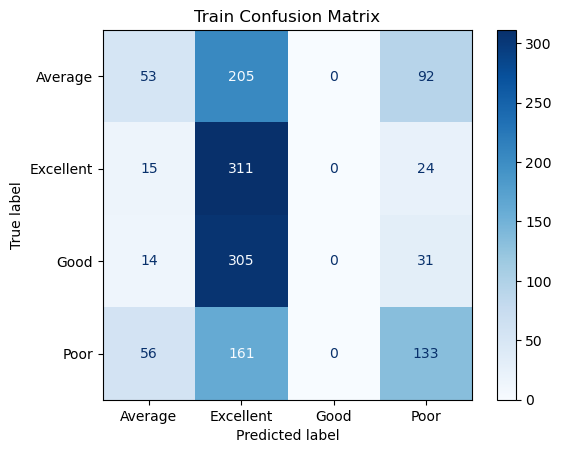

<Figure size 800x600 with 0 Axes>

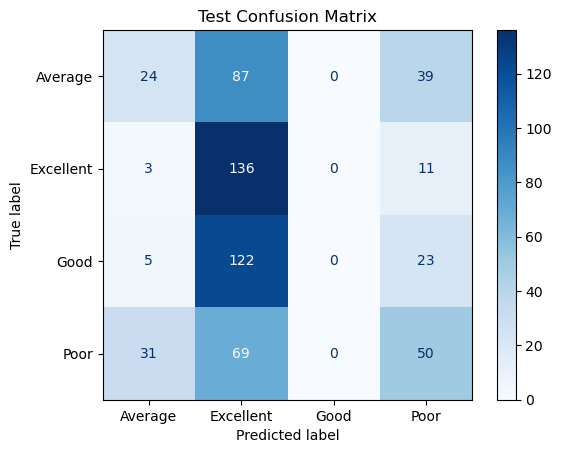

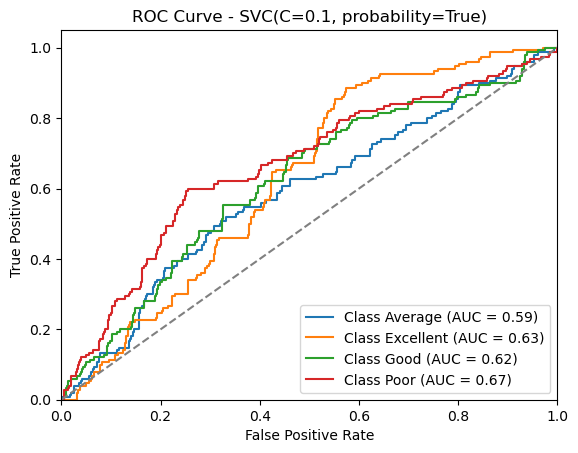

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Metric,Train Set,Test Set
0,Accuracy,0.355000,0.35000
1,Precision,0.293940,0.27899
2,Recall,0.355000,0.35000
3,F1 Score,0.276601,0.26848


In [46]:
cm_plot_display(y_train, y_pred_tr, y_test, y_pred)
plot_roc_curve(best_svm, X_test, y_test, classes=['Average' ,'Excellent' ,'Good' ,'Poor'])
evaluation_metrics = calculate_performance_metrics(y_train, y_pred_tr, y_test, y_pred, average='weighted')
evaluation_metrics

In [47]:
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [48]:
drugTree.fit(X_train,y_train_encoded)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [49]:
predTree = drugTree.predict(X_test)
predTree_tr = drugTree.predict(X_train)

In [50]:
from sklearn import metrics

print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test_encoded, predTree))

DecisionTrees's Accuracy:  0.9166666666666666


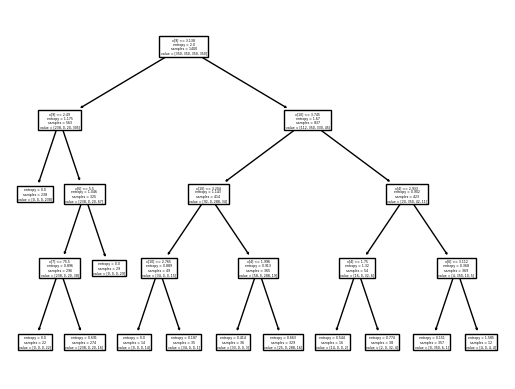

In [51]:
tree.plot_tree(drugTree)
plt.show()

In [52]:
evaluation_metrics = calculate_performance_metrics(y_train_encoded, predTree_tr, y_test_encoded, predTree, average='weighted')
evaluation_metrics

,Metric,Train Set,Test Set
0,Accuracy,0.925714,0.916667
1,Precision,0.929570,0.921997
2,Recall,0.925714,0.916667
3,F1 Score,0.926058,0.917207


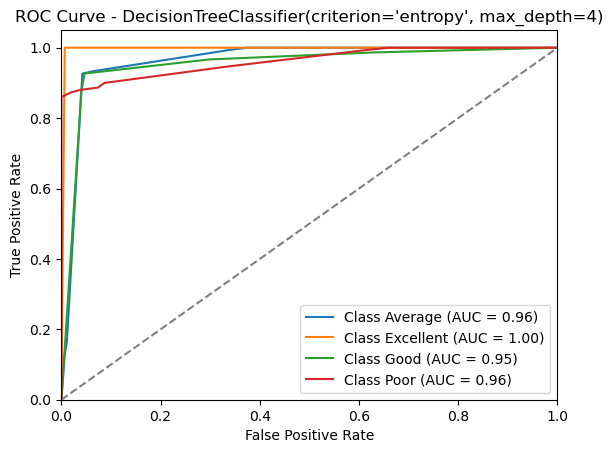

In [53]:
plot_roc_curve(drugTree, X_test, y_test, classes=['Average' ,'Excellent' ,'Good' ,'Poor'])


In [54]:
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.fit_transform(y_test)


In [55]:
evaluation_metrics = calculate_performance_metrics(y_train_encoded, predTree_tr, y_test_encoded, predTree, average='weighted')
evaluation_metrics

,Metric,Train Set,Test Set
0,Accuracy,0.925714,0.916667
1,Precision,0.929570,0.921997
2,Recall,0.925714,0.916667
3,F1 Score,0.926058,0.917207


In [56]:
def cm_plot_display(y_train,y_pred_tr, y_test, y_pred):

    cm = confusion_matrix(y_train, y_pred_tr)
    
    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_).plot(cmap=plt.cm.Blues, values_format='d')
    plt.title('Train Confusion Matrix')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()

    cm_ts = confusion_matrix(y_test, y_pred)
    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    ConfusionMatrixDisplay(confusion_matrix=cm_ts, display_labels=label_encoder.classes_).plot(cmap=plt.cm.Blues, values_format='d')
    plt.title('Test Confusion Matrix')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()
    

<Figure size 800x600 with 0 Axes>

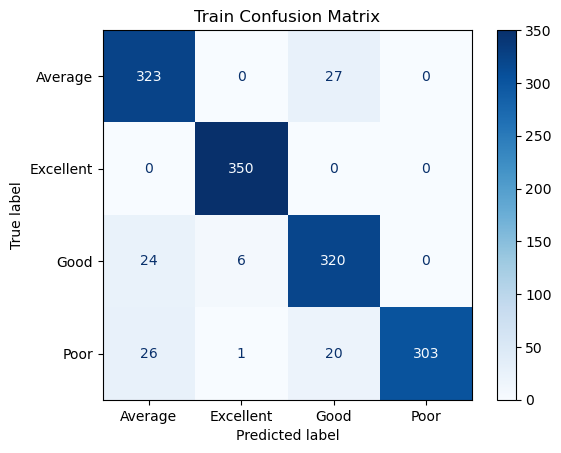

<Figure size 800x600 with 0 Axes>

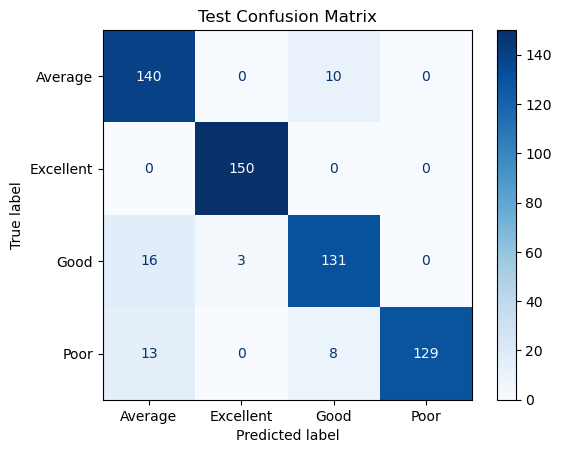

In [57]:
cm_plot_display(y_train_encoded,predTree_tr, y_test_encoded, predTree)


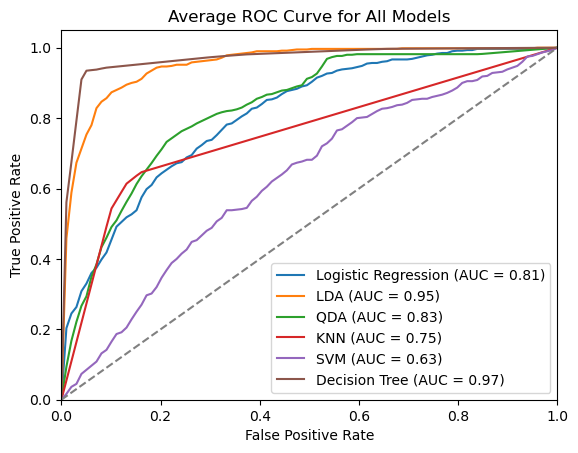

In [58]:
def plot_average_roc(models, X_test, y_test, classes):
    """
    Plot the average ROC curves for multiple models.

    Parameters:
    models (dict): Dictionary of model names and trained models.
    X_test (array-like): Test feature set.
    y_test (array-like): True labels for the test set.
    classes (list): List of class names used for binarization.
    """
    # Binarize the test labels
    y_test_bin = label_binarize(y_test, classes=classes)
    n_classes = y_test_bin.shape[1]

    # Prepare to collect mean ROC data
    mean_fpr = np.linspace(0, 1, 100)
    
    plt.figure()

    for name, model in models.items():
        # Get predicted probabilities
        y_score = model.predict_proba(X_test)

        # Calculate ROC curves for each class
        tpr_list = []
        for class_index in range(n_classes):
            fpr, tpr, _ = roc_curve(y_test_bin[:, class_index], y_score[:, class_index])
            tpr_interp = np.interp(mean_fpr, fpr, tpr)
            tpr_interp[0] = 0.0  # Ensure the curve starts at (0,0)
            tpr_list.append(tpr_interp)

        # Calculate the mean TPR and AUC
        mean_tpr = np.mean(tpr_list, axis=0)
        roc_auc = auc(mean_fpr, mean_tpr)

        # Plot ROC curve for each model
        plt.plot(mean_fpr, mean_tpr, label=f'{name} (AUC = {roc_auc:.2f})')

    # Plot the diagonal line
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

    # Final plot adjustments
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Average ROC Curve for All Models')
    plt.legend(loc="lower right")
    plt.show()

# Example usage with your fitted models
# Assume you have a dictionary of fitted models like this:
models = {
    'Logistic Regression': model,
    'LDA': lda,
    'QDA': qda,
    'KNN': knn_best,
    'SVM': best_svm,
    'Decision Tree': drugTree
}

# Define the class names (adjust based on your actual class labels)
class_names = ['Average', 'Excellent', 'Good', 'Poor']
import numpy as np
# Plot ROC curves for all models
plot_average_roc(models, X_test, y_test, class_names)

In [59]:
y_test_pred_logistic = model.predict(X_test)
y_test_pred_lda = lda.predict(X_test)
y_test_pred_qda = qda.predict(X_test)
y_test_pred_knn = knn_best.predict(X_test)
y_test_pred_svm = best_svm.predict(X_test)
y_test_pred_dt = drugTree.predict(X_test)

# Compute metrics for each model
metrics = {
    'Model': ['Logistic Regression', 'LDA', 'QDA', 'KNN', 'SVM', 'Decision Tree'],
    'Accuracy': [
        accuracy_score(y_test, y_test_pred_logistic),
        accuracy_score(y_test_encoded, y_test_pred_lda),
        accuracy_score(y_test_encoded, y_test_pred_qda),
        accuracy_score(y_test_encoded, y_test_pred_knn),
        accuracy_score(y_test, y_test_pred_svm)
        accuracy_score(y_test, y_test_pred_dt)

    ],
    'F1 Score': [
        f1_score(y_test, y_test_pred_logistic, average='weighted'),
        f1_score(y_test_encoded, y_test_pred_lda, average='weighted'),
        f1_score(y_test_encoded, y_test_pred_qda, average='weighted'),
        f1_score(y_test_encoded, y_test_pred_knn, average='weighted'),
        f1_score(y_test, y_test_pred_svm, average='weighted')
        f1_score(y_test, y_test_pred_dt, average='weighted')

    ]
}

metrics_df = pd.DataFrame(metrics)

SyntaxError: invalid syntax. Perhaps you forgot a comma? (2731725434.py, line 16)

In [ ]:
import matplotlib.pyplot as plt

def plot_metrics_bars(metrics_df):
    # Extract data
    models = metrics_df['Model']
    accuracy = metrics_df['Accuracy']
    f1_score = metrics_df['F1 Score']
    
    # Define bar width and positions
    bar_width = 0.35
    index = range(len(models))
    
    # Create plot
    plt.figure(figsize=(12, 6))
    
    # Plot bars for Accuracy
    plt.bar(index, accuracy, bar_width, label='Accuracy', color='b')
    
    # Plot bars for F1 Score, offset by bar width
    plt.bar([i + bar_width for i in index], f1_score, bar_width, label='F1 Score', color='r')
    
    # Add labels, title, and legend
    plt.xlabel('Model')
    plt.ylabel('Score')
    plt.title('Accuracy and F1 Score of Different Models')
    plt.xticks([i + bar_width / 2 for i in index], models)
    plt.legend()
    plt.grid(True)
    plt.show()

# Example Usage
# Assuming metrics_df is your DataFrame with 'Model', 'Accuracy', and 'F1 Score' columns
plot_metrics_bars(metrics_df)
